#                                      <center>Predicing Solar Irradiance</center>

<center><img src="https://media.giphy.com/media/ctGFLebG1AqK4/giphy.gif" width=300></center>

 # Importing Libraries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading Data

In [6]:
data=pd.read_csv("SolarPrediction.csv")

In [7]:
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [8]:
data.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


# Data Wrangling

<center><img src="https://media.giphy.com/media/3o7TKHzhNbSSRl7OGk/giphy.gif" width=300></center>

In [11]:
data["UNIXTime"].nunique()

32686

In [12]:
# can drop this

In [13]:
DnT=[]
for i in data["Data"]:
    DnT.append(i.split(" "))

In [18]:
DnT=np.array(DnT)
DnT

array([['9/29/2016', '12:00:00', 'AM'],
       ['9/29/2016', '12:00:00', 'AM'],
       ['9/29/2016', '12:00:00', 'AM'],
       ...,
       ['12/1/2016', '12:00:00', 'AM'],
       ['12/1/2016', '12:00:00', 'AM'],
       ['12/1/2016', '12:00:00', 'AM']], dtype='<U10')

In [20]:
dmy=[]
for i in DnT[:,0]:
    dmy.append(i.split("/"))

In [22]:
dmy=np.array(dmy)

In [23]:
data["date"]=dmy[:,0]
data["month"]=dmy[:,1]
data["year"]=dmy[:,2]

In [33]:
data["date"]=data["date"].astype("int")
data["month"]=data["month"].astype("int")
data["year"]=data["year"].astype("int")

In [36]:
time=[]
for i in DnT[:,1]:
    time.append(i.split(":"))

In [42]:
pd.DataFrame(time).nunique()

0    1
1    1
2    1
dtype: int64

In [43]:
# hence time is always 12 so no role can drop

In [44]:
time=[]
for i in data["Time"]:
    time.append(i.split(":"))

In [46]:
time=np.array(time)

In [47]:
data["hour"]=time[:,0]
data["minutes"]=time[:,1]
data["seconds"]=time[:,2]
data["hour"]=data["hour"].astype("int")
data["minutes"]=data["minutes"].astype("int")
data["seconds"]=data["seconds"].astype("int")

In [49]:
data.drop(["UNIXTime","Data","Time"],axis=1,inplace=True)
data

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,date,month,year,hour,minutes,seconds
0,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,2016,23,55,26
1,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,2016,23,50,23
2,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,2016,23,45,26
3,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,2016,23,40,21
4,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,2016,23,35,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,12,1,2016,0,20,4
32682,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,12,1,2016,0,15,1
32683,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,12,1,2016,0,10,1
32684,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00,12,1,2016,0,5,2


In [50]:
time=[]
for i in data["TimeSunRise"]:
    time.append(i.split(":"))
time=np.array(time)
time

array([['06', '13', '00'],
       ['06', '13', '00'],
       ['06', '13', '00'],
       ...,
       ['06', '41', '00'],
       ['06', '41', '00'],
       ['06', '41', '00']], dtype='<U2')

In [51]:
pd.DataFrame(time)[2].nunique()

1

In [52]:
data["RiseHour"]=time[:,0]
data["RiseMinutes"]=time[:,1]
data["RiseHour"]=data["RiseHour"].astype("int")
data["RiseMinutes"]=data["RiseMinutes"].astype("int")
data

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,date,month,year,hour,minutes,seconds,RiseHour,RiseMinutes
0,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,2016,23,55,26,6,13
1,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,2016,23,50,23,6,13
2,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,2016,23,45,26,6,13
3,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,2016,23,40,21,6,13
4,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,2016,23,35,24,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,12,1,2016,0,20,4,6,41
32682,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,12,1,2016,0,15,1,6,41
32683,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,12,1,2016,0,10,1,6,41
32684,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00,12,1,2016,0,5,2,6,41


In [53]:
time=[]
for i in data["TimeSunSet"]:
    time.append(i.split(":"))
time=np.array(time)
time

array([['18', '13', '00'],
       ['18', '13', '00'],
       ['18', '13', '00'],
       ...,
       ['17', '42', '00'],
       ['17', '42', '00'],
       ['17', '42', '00']], dtype='<U2')

In [54]:
pd.DataFrame(time)[2].nunique()

1

In [55]:
data["SetHour"]=time[:,0]
data["SetMinutes"]=time[:,1]
data["SetHour"]=data["SetHour"].astype("int")
data["SetMinutes"]=data["SetMinutes"].astype("int")
data

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,date,month,year,hour,minutes,seconds,RiseHour,RiseMinutes,SetHour,SetMinutes
0,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,29,2016,23,55,26,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,29,2016,23,50,23,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,29,2016,23,45,26,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,29,2016,23,40,21,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,29,2016,23,35,24,6,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00,12,1,2016,0,20,4,6,41,17,42
32682,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00,12,1,2016,0,15,1,6,41,17,42
32683,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00,12,1,2016,0,10,1,6,41,17,42
32684,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00,12,1,2016,0,5,2,6,41,17,42


In [56]:
data.drop(["TimeSunRise","TimeSunSet"],axis=1,inplace=True)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               32686 non-null  float64
 1   Temperature             32686 non-null  int64  
 2   Pressure                32686 non-null  float64
 3   Humidity                32686 non-null  int64  
 4   WindDirection(Degrees)  32686 non-null  float64
 5   Speed                   32686 non-null  float64
 6   date                    32686 non-null  int32  
 7   month                   32686 non-null  int32  
 8   year                    32686 non-null  int32  
 9   hour                    32686 non-null  int32  
 10  minutes                 32686 non-null  int32  
 11  seconds                 32686 non-null  int32  
 12  RiseHour                32686 non-null  int32  
 13  RiseMinutes             32686 non-null  int32  
 14  SetHour                 32686 non-null

In [58]:
data

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,date,month,year,hour,minutes,seconds,RiseHour,RiseMinutes,SetHour,SetMinutes
0,1.21,48,30.46,59,177.39,5.62,9,29,2016,23,55,26,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,2016,23,50,23,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,2016,23,45,26,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,2016,23,40,21,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,2016,23,35,24,6,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,44,30.43,102,145.42,6.75,12,1,2016,0,20,4,6,41,17,42
32682,1.17,44,30.42,102,117.78,6.75,12,1,2016,0,15,1,6,41,17,42
32683,1.20,44,30.42,102,145.19,9.00,12,1,2016,0,10,1,6,41,17,42
32684,1.23,44,30.42,101,164.19,7.87,12,1,2016,0,5,2,6,41,17,42


In [60]:
data["year"].nunique()

1

In [61]:
data.drop("year",axis=1,inplace=True)
data

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,date,month,hour,minutes,seconds,RiseHour,RiseMinutes,SetHour,SetMinutes
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,26,6,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,23,6,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,26,6,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,21,6,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,24,6,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1.22,44,30.43,102,145.42,6.75,12,1,0,20,4,6,41,17,42
32682,1.17,44,30.42,102,117.78,6.75,12,1,0,15,1,6,41,17,42
32683,1.20,44,30.42,102,145.19,9.00,12,1,0,10,1,6,41,17,42
32684,1.23,44,30.42,101,164.19,7.87,12,1,0,5,2,6,41,17,42


In [70]:
data["RiseHour"].nunique()

1

In [71]:
data.drop("RiseHour",axis=1,inplace=True)

In [72]:
x=data.drop("Radiation",axis=1)
y=data["Radiation"]

In [106]:
from sklearn.preprocessing import MinMaxScaler 
x=MinMaxScaler().fit_transform(x)

In [155]:
from sklearn.model_selection import train_test_split as TTS
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.3,random_state=0)

# Feature selection

<center><img src="https://media.giphy.com/media/3o7TKGMEexYBEhuoGk/giphy.gif" width=300></center>

In [156]:
data.corr()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,date,month,hour,minutes,seconds,RiseMinutes,SetHour,SetMinutes
Radiation,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,-0.095450,0.039978,0.004398,-0.000730,-0.031270,-0.092850,0.048719,-0.039816
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.354560,-0.123705,0.197464,-0.001934,-0.036147,-0.380968,0.300920,-0.242881
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.341759,-0.024633,0.091069,0.001860,-0.031102,-0.380399,0.151939,-0.119599
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.068854,0.014637,0.077899,0.000499,-0.027682,-0.023955,0.145143,-0.119526
WindDirection(Degrees),-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.181485,-0.082354,-0.077969,-0.000602,-0.032568,0.176929,-0.078540,0.070030
Speed,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.150822,0.117337,-0.057939,0.000192,-0.032934,0.167075,-0.159384,0.119926
date,-0.095450,-0.354560,-0.341759,-0.068854,0.181485,0.150822,1.000000,0.038027,-0.005396,0.000168,0.220563,0.952472,-0.784783,0.541883
month,0.039978,-0.123705,-0.024633,0.014637,-0.082354,0.117337,0.038027,1.000000,-0.008010,-0.000196,0.089078,0.274522,-0.263575,0.265662
hour,0.004398,0.197464,0.091069,0.077899,-0.077969,-0.057939,-0.005396,-0.008010,1.000000,-0.004052,0.004199,-0.006772,0.008629,-0.007056
minutes,-0.000730,-0.001934,0.001860,0.000499,-0.000602,0.000192,0.000168,-0.000196,-0.004052,1.000000,0.002517,-0.000158,0.001052,-0.002215


<Axes: >

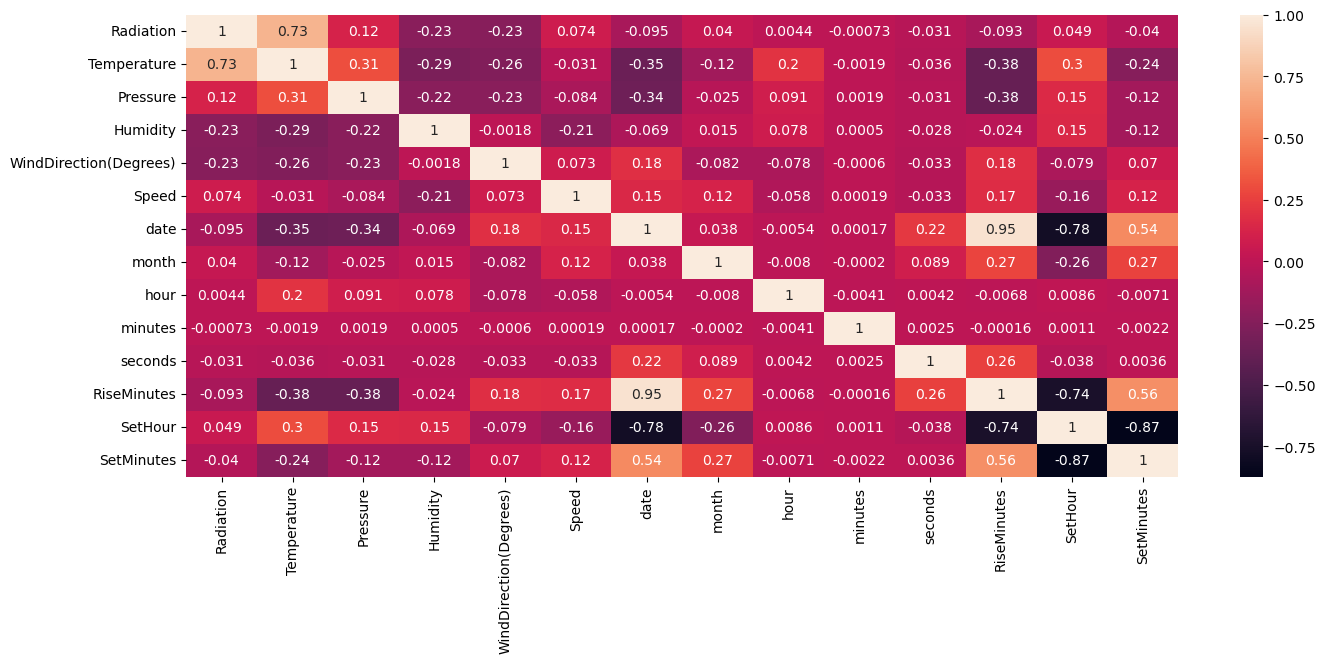

In [157]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True)

In [158]:
# from this most imp seems temp,pressure,humidity,wind direction

In [159]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [160]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder().fit_transform(y_train)
le
feat=SelectKBest(score_func=chi2,k=10).fit(x_train,le)

In [161]:
pd.DataFrame(feat.scores_,data.drop("Radiation",axis=1).columns).sort_values(by=0,ascending=False)

,0
SetHour,8848.663226
date,3440.177504
RiseMinutes,2943.204913
WindDirection(Degrees),2373.767060
month,2069.129783
minutes,1960.130371
seconds,1682.879683
SetMinutes,1372.473868
Temperature,1173.080594
Humidity,1144.799110


In [162]:
from sklearn.ensemble import ExtraTreesRegressor as ex
model=ex(n_estimators=10).fit(x_train,le)

In [163]:
feat_imp=pd.Series(model.feature_importances_,index=data.drop("Radiation",axis=1).columns)

In [164]:
feat_imp

Temperature               0.431213
Pressure                  0.011096
Humidity                  0.034671
WindDirection(Degrees)    0.014508
Speed                     0.005398
date                      0.007081
month                     0.015013
hour                      0.438431
minutes                   0.010658
seconds                   0.006103
RiseMinutes               0.013056
SetHour                   0.004824
SetMinutes                0.007948
dtype: float64

<Axes: xlabel='Temperature', ylabel='Count'>

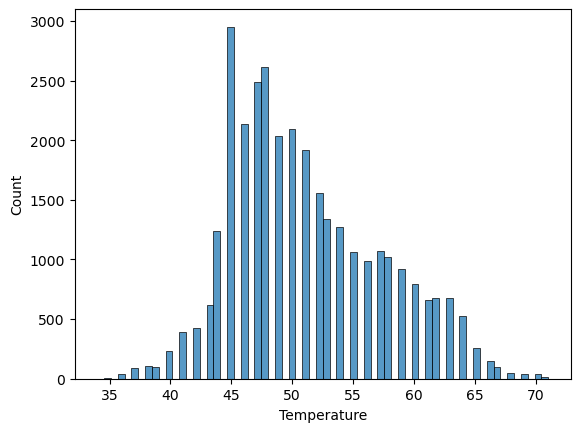

In [165]:
sns.histplot(data["Temperature"])

<Axes: ylabel='Count'>

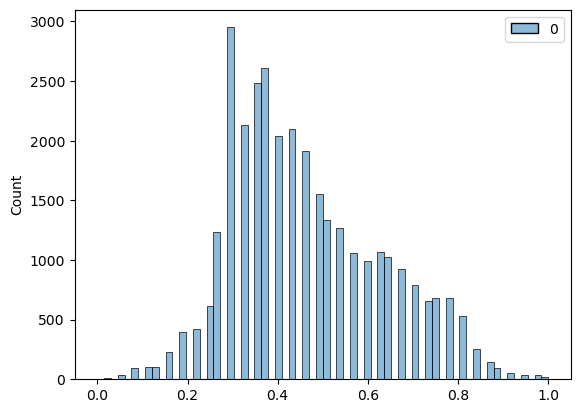

In [166]:
sns.histplot(MinMaxScaler().fit_transform(np.array(data["Temperature"]).reshape(-1,1)))

<Axes: ylabel='Count'>

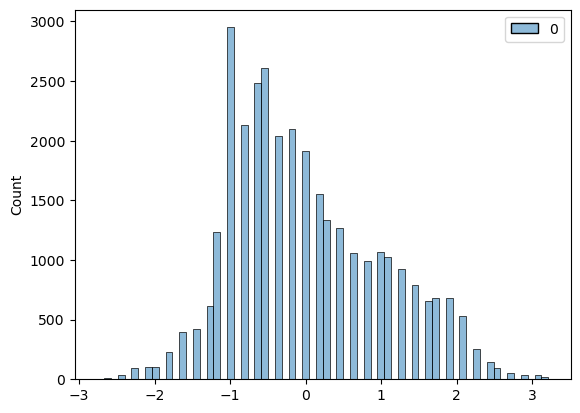

In [167]:
from sklearn.preprocessing import StandardScaler
sns.histplot(StandardScaler().fit_transform(np.array(data["Temperature"]).reshape(-1,1)))

<Axes: xlabel='Temperature', ylabel='Count'>

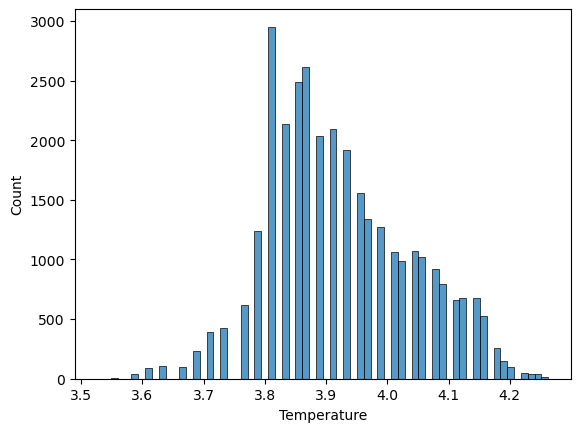

In [168]:
sns.histplot(data["Temperature"].transform(np.log))

<Axes: ylabel='Count'>

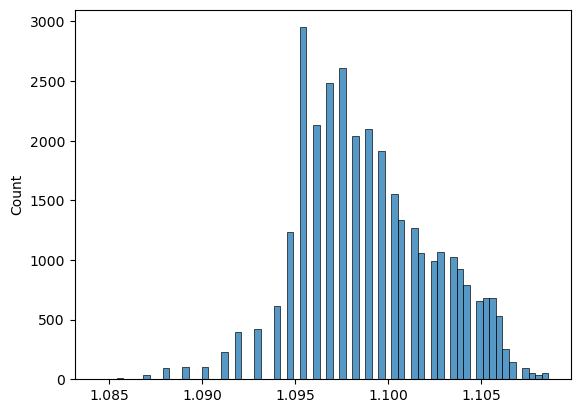

In [169]:
import scipy.stats as stats
sns.histplot(stats.boxcox(np.array(data["Temperature"]))[0])

In [170]:
# temperature is very close to normal distribution

In [171]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Implementing Model

<center><img src="https://media.giphy.com/media/3o7TKzyIPAiMR1pErK/giphy.gif" width=300></center>

In [279]:
from xgboost import XGBRegressor

In [280]:
param={"learning_rate":0.1,
      "max_depth":8}
model=XGBRegressor(**param)

In [281]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [282]:
y_predict=model.predict(x_test)

In [283]:
y_predict

array([ 4.5639749e+02,  2.7137454e+02,  8.1239972e+02, ...,
        6.9035465e-01, -7.5538415e-01,  1.6716691e+00], dtype=float32)

# Accuracy testing

In [284]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [285]:
rmse=np.sqrt(mean_squared_error(y_predict,y_test))
r2_s=r2_score(y_predict,y_test)

In [286]:
print("RMSE : ",rmse)
print("R2_SCORE : ",r2_s)

RMSE :  82.22408356130758
R2_SCORE :  0.9272338525041065


# Using Deep Learning Model to improve

In [383]:
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.models import Sequential

In [384]:
model=None
model=Sequential()

In [385]:
model.add(Dense(128,activation="relu",input_dim=13))
model.add(Dropout(0.33))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.33))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.33))
model.add(Dense(1,activation="relu"))

In [566]:
model.compile(metrics="mse",loss="mse",optimizer=Adam(learning_rate=0.0142))

In [567]:
model.fit(x_train,y_train)

715/715 [==============================] - 3s 3ms/step - loss: 14515.8740 - mse: 14515.8740


In [568]:
y_predict=model.predict(x_test)

307/307 [==============================] - 1s 2ms/step


In [569]:
print("RMSE : ",np.sqrt(mean_squared_error(y_predict,y_test)))
print("R2_SCORE : ",r2_score(y_predict,y_test))

RMSE :  103.64186060433211
R2_SCORE :  0.8674845409289136


<center><img src="https://media.giphy.com/media/l2QZSoIjDsMph1K5G/giphy.gif" width=400></center>